#### Using the Chicago Crime Dataset(any of the 3 sheets you choose), perfrom the following data preparation steps:
1. Use a funtion to Drop redundant columns (a redundant colum is one that gives infromation that another column already explains: eg ID and Case number) 
2. Use functions to create new columns for Months, Day, Season.
3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?
4.  According to location description, where does crime hapen the most?
5.  Did the Types of crime change as years go by? if yes/no. let the data show the insight.

- Submission Deadline: 02/11/2024
- Submission link (https://forms.gle/NSVRvGGir88wHsn59)

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [150]:
df = pd.read_csv('chicago1.csv')

In [151]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [152]:
df.index += 1

In [153]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
2,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
3,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
4,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
5,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [154]:
df.shape

(1000, 23)

In [155]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [156]:
df.columns.nunique()

23

# Answer 1

In [157]:
def drop_redundant_columns(data):
    reduntant_columns = ['ID', 'X Coordinate', 'Y Coordinate', 'Latitude',
       'Longitude', 'Unnamed: 0']
    droped_columns = df.drop(columns= reduntant_columns)
    return droped_columns

In [158]:
df = drop_redundant_columns(df)

In [159]:
df.columns

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On', 'Location'],
      dtype='object')

In [160]:
df.columns.nunique()

17

In [161]:
df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location
1,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)"
2,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)"
3,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)"
4,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)"
5,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)"


# Answer 2

In [162]:
# Use functions to create new columns for Months, Day, Season.


In [163]:

# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Function to extract month
def extract_month(date):
    return date.strftime('%B')

# Function to extract day
def extract_day(date):
    return date.strftime('%A')

# Function to determine season
def determine_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Creating the new columns for Month, Day, and Season
df['Month'] = df['Date'].apply(extract_month)
df['Day'] = df['Date'].apply(extract_day)
df['Season'] = df['Date'].apply(determine_season)


date_df = df[['Date','Month', 'Day', 'Season']]
# merging both DFs
new_df = pd.merge(df, date_df)


In [164]:
date_df.head()

,Date,Month,Day,Season
1,2008-07-26 14:30:00,July,Saturday,Summer
2,2018-07-31 10:57:00,July,Tuesday,Summer
3,2007-04-27 10:30:00,April,Friday,Spring
4,2018-07-23 08:55:00,July,Monday,Summer
5,2021-07-11 06:40:00,July,Sunday,Summer


In [165]:
new_df

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location,Month,Day,Season
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",July,Saturday,Summer
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",July,Tuesday,Summer
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",April,Friday,Spring
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)",July,Monday,Summer
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)",July,Sunday,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,HN325328,2007-05-06 02:08:51,080XX S MUSKEGON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,422,4.0,7.0,46.0,14,2007,02/10/2018 03:50:01 PM,"(41.74925367, -87.555275558)",May,Sunday,Spring
998,HT181792,2011-02-27 18:00:00,052XX S BLACKSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,2131,2.0,4.0,41.0,08B,2011,02/10/2018 03:50:01 PM,"(41.80062644, -87.590467932)",February,Sunday,Winter
999,HL263341,2005-03-29 17:30:00,003XX S WABASH AVE,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,123,1.0,2.0,32.0,06,2005,02/28/2018 03:56:25 PM,"(41.877745403, -87.626074642)",March,Tuesday,Spring
1000,HR401314,2009-06-29 23:00:00,068XX S CHAPPEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,331,3.0,5.0,43.0,08B,2009,02/28/2018 03:56:25 PM,"(41.770981786, -87.575208206)",June,Monday,Summer


# Answer 3

In [166]:
# Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?

In [167]:
q3_df = df.copy()

In [168]:
q3_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Location,Month,Day,Season
1,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)",July,Saturday,Summer
2,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)",July,Tuesday,Summer
3,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)",April,Friday,Spring
4,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)",July,Monday,Summer
5,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)",July,Sunday,Summer


In [169]:
subset_df = q3_df[['Month', 'Day', 'Season', 'Year', 'Primary Type']]

In [170]:
subset_df.head()

,Month,Day,Season,Year,Primary Type
1,July,Saturday,Summer,2008,CRIMINAL DAMAGE
2,July,Tuesday,Summer,2018,WEAPONS VIOLATION
3,April,Friday,Spring,2007,BURGLARY
4,July,Monday,Summer,2018,ASSAULT
5,July,Sunday,Summer,2021,ASSAULT


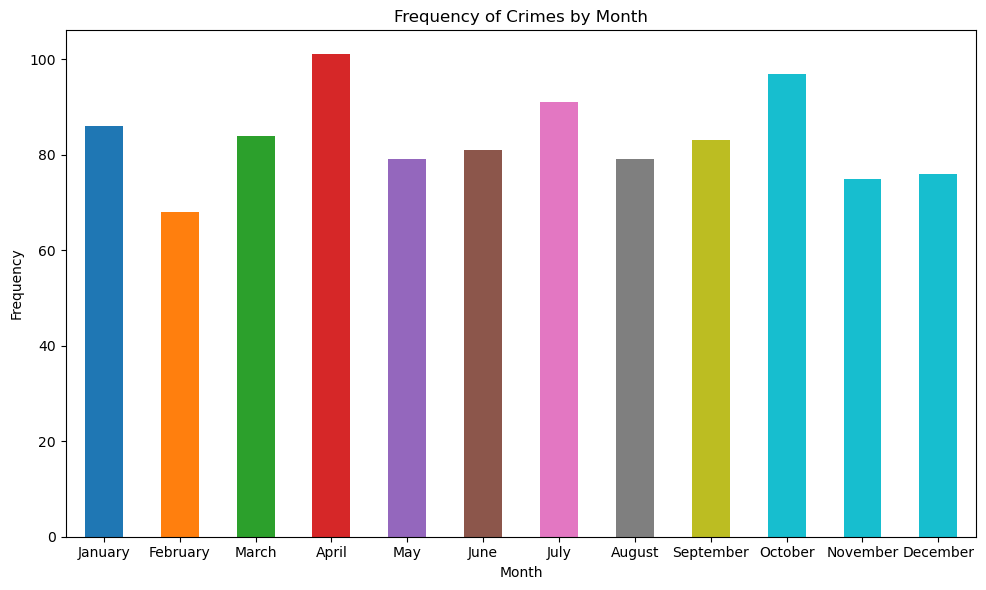

In [171]:
custom_month_order = list(calendar.month_name)[1:]
crime_by_month = subset_df.groupby(subset_df['Month']).size()
colors = plt.cm.tab10(np.arange(len(crime_by_month)))

# Plot the frequency of crimes for each month
plt.figure(figsize=(10, 6))
crime_by_month.loc[custom_month_order].plot(kind='bar', color=colors)
plt.title('Frequency of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [119]:
print(f'The month with the highest crime is {crime_by_month.idxmax()} with a total crime of {crime_by_month.max()}')

The month with the highest crime is April with a total crime of 101


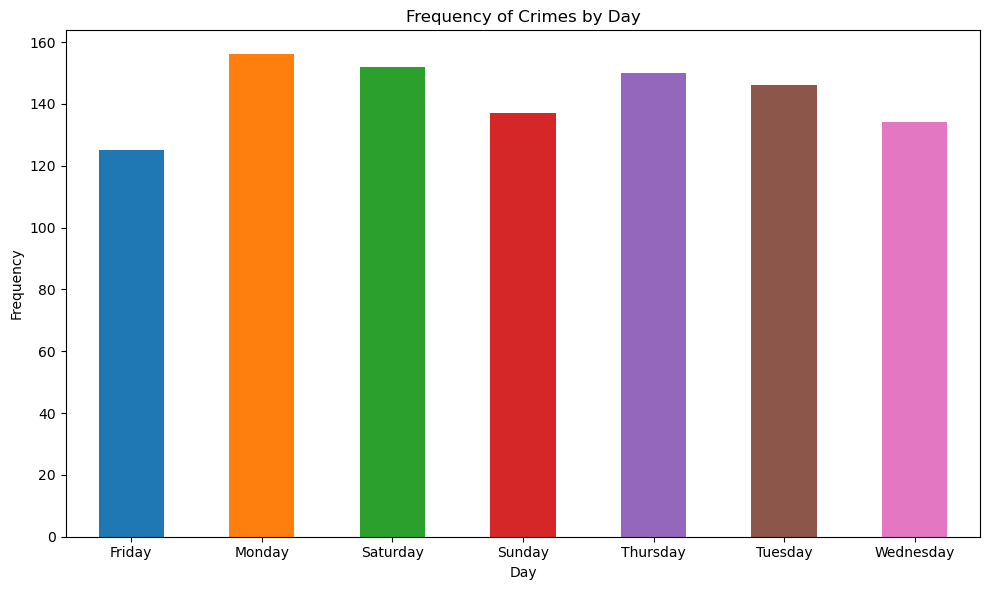

In [142]:

crime_by_day = subset_df.groupby(subset_df['Day']).size()
colors = plt.cm.tab10(np.arange(len(crime_by_day)))

# Plot of the frequency of crimes for each month
plt.figure(figsize=(10, 6))
crime_by_day.plot(kind='bar', color=colors)
plt.title('Frequency of Crimes by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [127]:
subset_df['Day'].value_counts()

Monday       156
Saturday     152
Thursday     150
Tuesday      146
Sunday       137
Wednesday    134
Friday       125
Name: Day, dtype: int64

In [129]:
print(f'The day of the week with the highest crime is {crime_by_day.idxmax()} with a total crime of {crime_by_day.max()}')

The day of the week with the highest crime is Monday with a total crime of 156


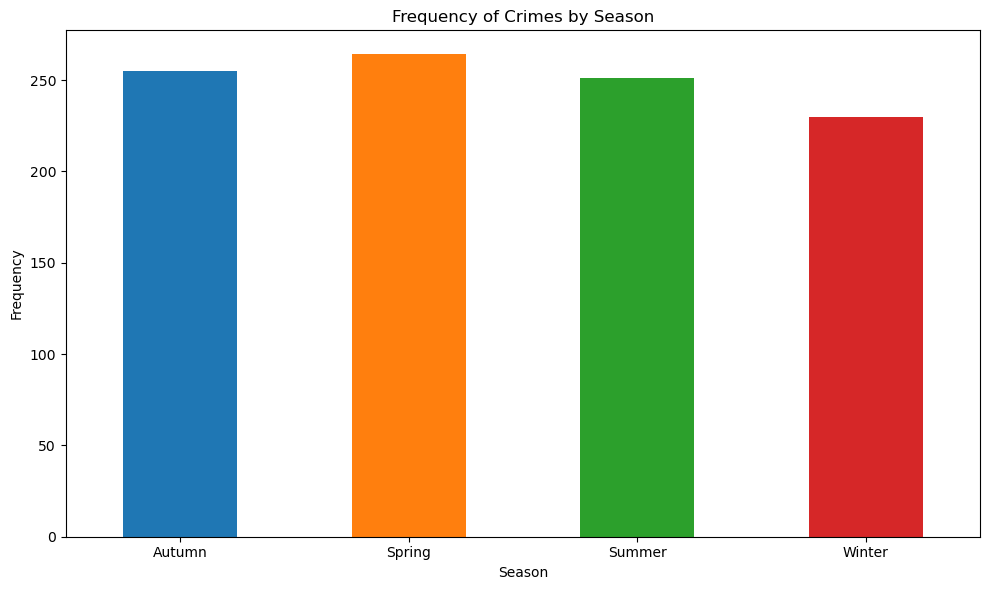

In [141]:

crime_by_season = subset_df.groupby(subset_df['Season']).size()
colors = plt.cm.tab10(np.arange(len(crime_by_season)))

# Plot the frequency of crimes for each month
plt.figure(figsize=(10, 6))
crime_by_season.plot(kind='bar', color=colors)  # Reorder the data based on custom order and set colors
plt.title('Frequency of Crimes by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [134]:
subset_df['Season'].value_counts()

Spring    264
Autumn    255
Summer    251
Winter    230
Name: Season, dtype: int64

In [143]:
print(f'The Season with the highest crime is {crime_by_season.idxmax()} with a total crime of {crime_by_season.max()}')

The Season with the highest crime is Spring with a total crime of 264


# Answer 4

In [39]:
# According to location description, where does crime hapen the most?

In [40]:
# Grouping the data by location description and calculate the frequency of crimes
location_frequency = q3_df['Location Description'].value_counts()

# Finding the location with the highest frequency of crimes
most_common_location = location_frequency.idxmax()

print("Location where crime happens the most:", most_common_location)

Location where crime happens the most: STREET


In [103]:
location_frequency.head()

STREET                            251
RESIDENCE                         169
APARTMENT                         113
SIDEWALK                           98
PARKING LOT/GARAGE(NON.RESID.)     31
Name: Location Description, dtype: int64

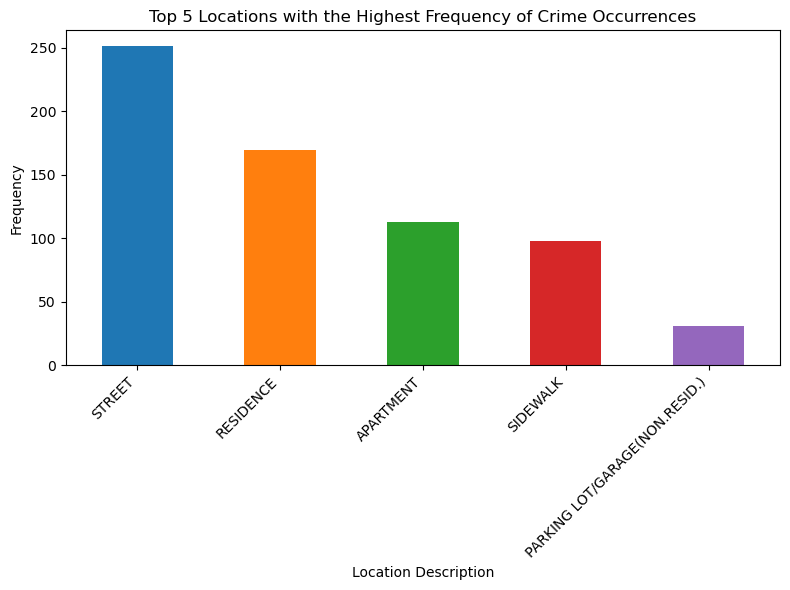

In [42]:


# Group the data by location description and calculate the frequency of crimes
location_frequency = df['Location Description'].value_counts().head(5)

# Generate a list of colors
colors = plt.cm.tab10(np.arange(len(location_frequency)))

# Plot the frequency of crime occurrences for the top 5 location descriptions
plt.figure(figsize=(8, 6))
location_frequency.plot(kind='bar', color=colors)
plt.title('Top 5 Locations with the Highest Frequency of Crime Occurrences')
plt.xlabel('Location Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Answer 5

In [43]:
# Did the Types of crime change as years go by? if yes/no. let the data show the insight.

In [44]:
# focused on the top 5 crimes
# Get the top 5 most frequent crime types
top_crime_types = q3_df['Primary Type'].value_counts().nlargest(5).index

# Filtering the DataFrame to include only the top 5 crime types
df_top_crimes = q3_df[q3_df['Primary Type'].isin(top_crime_types)]

# Grouping the data by year and type of crime, and calculating the frequency of each crime type
crime_by_year = df_top_crimes.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)
crime_by_year

Primary Type,ASSAULT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,THEFT
Year,,,,,
2001,8,10,11,10,11
2002,3,13,3,4,10
2003,5,11,10,5,11
2004,0,18,7,9,11
2005,5,10,8,15,18
2006,1,12,7,9,8
2007,3,9,9,8,13
2008,3,10,5,4,7
2009,3,9,2,9,10


### The plot was densed so i focused on the top 5 crimes

C:\Users\KLAUS\AppData\Local\Temp\ipykernel_22152\3810963258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_crimes['Year Group'] = pd.cut(df_top_crimes['Year'], bins=bins, labels=labels, right=False)


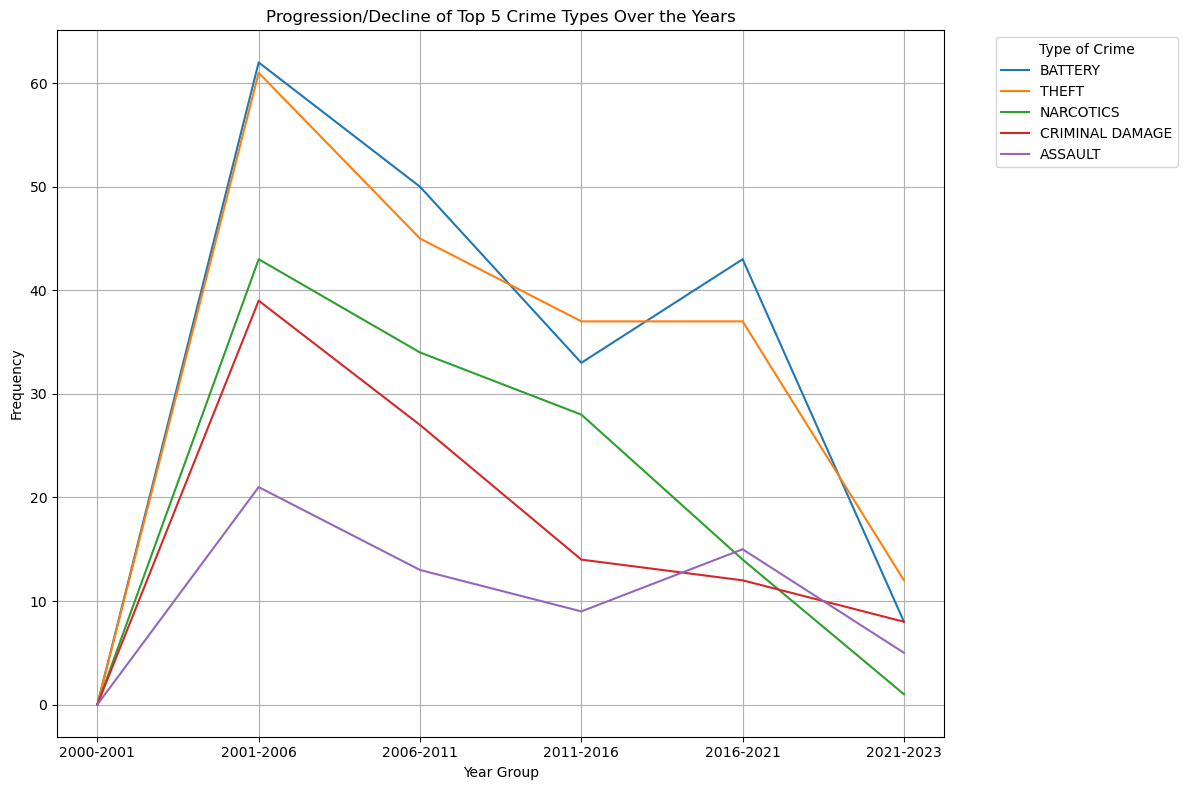

In [45]:
# Get the top 5 most frequent crime types
top_crime_types = df['Primary Type'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 crime types
df_top_crimes = df[df['Primary Type'].isin(top_crime_types)]

# Creating bins for years
bins = [min(df['Year']) - 1] + list(range(min(df['Year']), max(df['Year']) + 1, 5)) + [max(df['Year']) + 1]

# Creating labels for the bins (years)
labels = [f"{start}-{end}" for start, end in zip(bins[:-1], bins[1:])]

# Applying binning to the 'Year' column
df_top_crimes['Year Group'] = pd.cut(df_top_crimes['Year'], bins=bins, labels=labels, right=False)

# Grouping the data by year group and type of crime, and calculating the frequency of each crime type
crime_by_year_group = df_top_crimes.groupby(['Year Group', 'Primary Type']).size().unstack(fill_value=0)

# Ploting the progression or decline of the top 5 crimes over the years
plt.figure(figsize=(12, 8))
for crime_type in top_crime_types:
    plt.plot(crime_by_year_group.index, crime_by_year_group[crime_type], label=crime_type)

plt.title('Progression/Decline of Top 5 Crime Types Over the Years')
plt.xlabel('Year Group')
plt.ylabel('Frequency')
plt.legend(title='Type of Crime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### From the graphical distribution, it can be seen that the Particular Type of crime peaked and Declines over the years for all crimes, specifically all the crime types are currently on decline according to the line graph